# AbAg_Affinity dataset

This notebook generates a dataframe containing information about data first version of the Antibody-Antigen_complexes dataset:

- Overlap of AbDb data (filtered and enriched abag data) with SAbDab data (affinity values for conformtions) 

In [1]:
import os
import pandas as pd
from abag_affinity.utils.config import read_config, get_data_paths
import matplotlib.pyplot as plt
import seaborn as sns

config = read_config("../../config.yaml")
summary_path = os.path.join(config["DATASETS"]["path"], config["DATASETS"]["abag_affinity"]["folder_path"], config["DATASETS"]["abag_affinity"]["summary"])

In [2]:
summary_df = pd.read_csv(summary_path, index_col=0)
summary_df["validation"] = summary_df["validation"].astype(str).apply(lambda x: x.split(".")[0] if x != "nan" else "0")
summary_df.head()

,pdb,filename,chain_infos,-log(Kd),delta_g,validation,test
1bvk,1bvk,1bvk.pdb,"{'h': 0, 'l': 0, 'f': 1}",7.853872,-10.53000,2,False
1dqj,1dqj,1dqj.pdb,"{'h': 0, 'l': 0, 'c': 1}",8.543634,-11.45000,4,False
1e6j,1e6j,1e6j.pdb,"{'h': 0, 'l': 0, 'p': 1}",7.537602,-10.28000,4,False
1f90,1f90,1f90.pdb,"{'h': 0, 'l': 0, 'e': 1}",7.924453,-10.80000,0,True
1fsk,1fsk,1fsk.pdb,"{'h': 0, 'l': 0, 'g': 1}",9.619789,-13.12374,4,False


In [3]:
num_samples = len(summary_df["pdb"].unique())
print(f"Total lenght of AbAg-Affinity dataset = {num_samples}")

Total lenght of AbAg-Affinity dataset = 385


In [4]:
summary_df.groupby("validation")["pdb"].count()

validation
0    50
1    83
2    83
3    83
4    86
Name: pdb, dtype: int64

## Affinity distribution

### Delta G analysis

In [5]:
summary_df["delta_g"].describe()

count    370.000000
mean     -11.244302
std        1.928487
min      -16.056540
25%      -12.417858
50%      -11.206815
75%      -10.033107
max       -5.178507
Name: delta_g, dtype: float64

<AxesSubplot:xlabel='delta_g', ylabel='Count'>

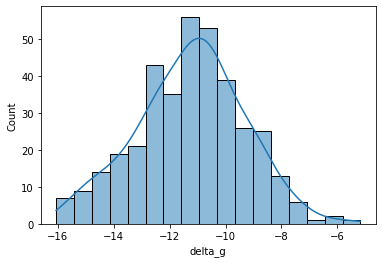

In [6]:
sns.histplot(summary_df, x="delta_g", kde=True)

<AxesSubplot:xlabel='delta_g', ylabel='Count'>

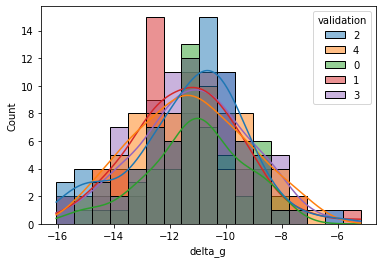

In [7]:
#summary_df.loc[summary_df["validation"] == 3, "validation"] = 2 # only compare to validation set 1 for now
sns.histplot(summary_df, x="delta_g", hue="validation", kde=True)

## -log(Kg) Analyis

In [8]:
summary_df["-log(Kd)"].describe()

count    385.000000
mean       8.165188
std        1.450574
min        3.795880
25%        7.193820
50%        8.102373
75%        9.094204
max       11.769551
Name: -log(Kd), dtype: float64

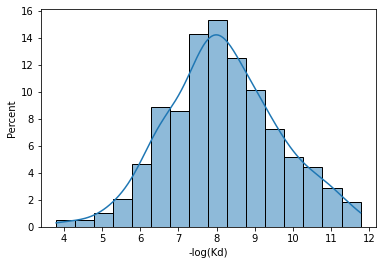

In [9]:
sns.histplot(summary_df, x="-log(Kd)", stat="percent", kde=True)
plt.savefig("./plots/abag_affinity_-log(Kd)_distribution.png")

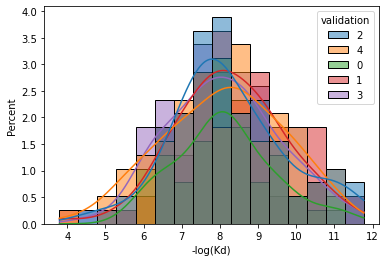

In [10]:
sns.histplot(summary_df, x="-log(Kd)", hue="validation", stat="percent", kde=True)
plt.savefig("./plots/abag_affinity_-log(Kd)_distribution_by_val_set.png")

In [15]:
summary_df

,pdb,filename,chain_infos,-log(Kd),delta_g,validation,test
1bvk,1bvk,1bvk.pdb,"{'h': 0, 'l': 0, 'f': 1}",7.853872,-10.530000,2,False
1dqj,1dqj,1dqj.pdb,"{'h': 0, 'l': 0, 'c': 1}",8.543634,-11.450000,4,False
1e6j,1e6j,1e6j.pdb,"{'h': 0, 'l': 0, 'p': 1}",7.537602,-10.280000,4,False
1f90,1f90,1f90.pdb,"{'h': 0, 'l': 0, 'e': 1}",7.924453,-10.800000,0,True
1fsk,1fsk,1fsk.pdb,"{'h': 0, 'l': 0, 'g': 1}",9.619789,-13.123740,4,False
...,...,...,...,...,...,...,...
6ii8,6ii8,6ii8.pdb,"{'h': 0, 'l': 0, 'c': 1}",6.413413,-8.749460,3,False
6ii9,6ii9,6ii9.pdb,"{'h': 0, 'l': 0, 'c': 1}",7.712198,-10.521321,2,False
6mhr,6mhr,6mhr.pdb,"{'h': 0, 'l': 0, 'f': 1}",7.657577,-10.446805,4,False
6mi2,6mi2,6mi2.pdb,"{'h': 0, 'l': 0, 'c': 1}",7.161151,-9.769558,4,False


In [23]:
import scipy
scipy.stats.kruskal(*[group["-log(Kd)"].values for name, group in summary_df.groupby("validation")])

KruskalResult(statistic=0.6691457564289534, pvalue=0.9550786565945522)

In [ ]:
sns.histplot(summary_df, x="-log(Kd)", hue="test", stat="percent",kde=True)
plt.savefig("./plots/abag_affinity_-log(Kd)_distribution_train_test.png")